In [149]:
import pandas as pd 

In [150]:
df=pd.read_csv("train.csv").drop(columns='subject')

In [151]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,WALKING_UPSTAIRS


In [152]:
df.value_counts('Activity')

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
dtype: int64

In [153]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [154]:
x  = df.drop('Activity',axis=1)
y = df['Activity']


In [155]:
le = LabelEncoder()
Y = le.fit_transform(y)

In [156]:
x_train , x_test, y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=42) 

In [157]:
print(x_train.shape)
print(x_test.shape)

(5881, 561)
(1471, 561)


### Applying Logistic Regression 

In [158]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [159]:
y_pred = log_reg.predict(x_test)
y_pred

array([4, 4, 3, ..., 1, 1, 1])

In [160]:
y_test

array([4, 4, 3, ..., 1, 1, 1])

In [161]:
accuracy_score(y_test,y_pred)*100

98.09653297076818

#### The Accuracy is 98% , with 562 columns 

In [162]:
# df.iloc[:2]

In [163]:
def getDuplicateColumns(df):
	duplicateColumnNames = set()
	for x in range(df.shape[1]):
		# Take column at xth index.
		col = df.iloc[:, x]
		# Iterate through all the columns in
		# DataFrame from (x + 1)th index to
		# last index
		for y in range(x + 1, df.shape[1]):

			# Take column at yth index.
			otherCol = df.iloc[:, y]

			# Check if two columns at x & y
			# index are equal or not,
			# if equal then adding
			# to the set
			if col.equals(otherCol):
				duplicateColumnNames.add(df.columns.values[y])

	# Return list of unique column names
	# whose contents are duplicates.
	return list(duplicateColumnNames)

#### Removing Columns With Duplicates Values 

Reference: 

https://www.statology.org/pandas-drop-duplicate-columns/

In [164]:
duplicate_columns=x_train.T.drop_duplicates().T

In [165]:
duplicate_columns

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
57,0.278007,-0.017803,-0.108965,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
4154,0.237617,-0.000782,-0.114476,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
6945,0.290924,-0.050878,-0.073518,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
527,0.275268,-0.015050,-0.114204,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4196,0.278790,-0.018585,-0.106908,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,...,0.022624,0.417731,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,...,-0.039773,-0.021970,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,...,0.094031,0.527152,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,...,0.539885,-0.889671,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


### 1.Variance Threshold 

if Data is Normalize then 0.5 se 0.1 ke beechmai we must set the threshold

In [166]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [167]:
sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [168]:
sel.get_support() # true mtlb thredhold se upar & false mtlb threshold se neeche

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,

In [169]:
sum(sel.get_support())  # itne columns threshold se upar hai 

369

In [170]:
column_above_threshold = x_train.columns[sel.get_support()]

In [171]:
column_above_threshold 

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=369)

In [172]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

x_train = pd.DataFrame(x_train,columns=column_above_threshold)
x_test = pd.DataFrame(x_test,columns=column_above_threshold)

In [173]:
x_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,-0.077885,-0.373579,0.454289,...,0.022624,0.417731,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5877,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,-0.017039,-0.123285,0.123907,...,-0.039773,-0.021970,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5878,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,-0.236201,-0.441355,0.530629,...,0.094031,0.527152,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
5879,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,-0.570198,-0.805684,0.849776,...,0.539885,-0.889671,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


In [174]:
x_test

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,0.023174,-0.274788,-0.176416,...,0.454181,-0.730593,-0.932568,-0.034924,0.558036,0.258975,-0.854858,-0.784330,0.222960,-0.066506
1,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,0.586004,-0.089706,-0.307547,0.201299,...,0.190745,-0.032958,-0.338095,0.017986,-0.475545,0.942947,-0.567147,-0.665156,0.178975,0.243362
2,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,0.074430,-0.228225,-0.346372,0.339322,...,0.299767,-0.351997,-0.698254,-0.044663,-0.551806,-0.680774,0.161405,-0.857202,0.192929,0.046716
3,-0.992196,-0.982169,-0.981127,-0.992838,-0.981366,-0.979864,-0.931924,-0.560341,-0.809997,0.840250,...,0.335848,-0.623358,-0.906098,-0.177275,-0.309304,0.176515,-0.143818,-0.625215,-0.106678,-0.147469
4,0.075014,0.046502,-0.369482,-0.024794,-0.085337,-0.385018,0.562230,0.093312,-0.200019,0.213969,...,-0.125979,0.020630,-0.316113,0.347143,0.590475,0.831084,0.465453,-0.860617,0.150598,-0.067109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,-0.947145,-0.835807,-0.895158,-0.954108,-0.852196,-0.903123,-0.847094,-0.408376,-0.785863,0.830999,...,-0.123063,0.175028,-0.181660,-0.023781,-0.034551,-0.600486,0.615559,0.613787,-0.442956,-0.566134
1467,-0.975745,-0.876568,-0.932322,-0.984813,-0.901080,-0.944801,-0.862074,-0.454572,-0.779758,0.828468,...,-0.458629,0.046807,-0.445592,0.075848,0.044195,0.953750,-0.689075,-0.893987,0.144318,-0.042245
1468,-0.994198,-0.988329,-0.990618,-0.994584,-0.987081,-0.990640,-0.936933,-0.569781,-0.823135,0.848724,...,0.221271,-0.413851,-0.788168,-0.078558,0.189544,-0.653477,0.162169,-0.322828,-0.263522,-0.266071
1469,-0.997517,-0.982207,-0.974343,-0.997900,-0.985061,-0.971293,-0.938729,-0.555729,-0.804258,0.851457,...,0.079559,-0.492779,-0.815681,-0.021362,-0.095886,0.271641,-0.123928,-0.923782,0.096799,-0.038975


### 2.) Correlation

In [175]:
import seaborn as sns 

In [176]:
x_train.corr()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.023914,-0.002241,-0.010535,0.024098,-0.005865,-0.014838,0.029230,-0.000207,-0.023622,-0.008700,...,-0.024274,0.031310,0.021829,-0.006297,0.013870,1.000000,-0.104987,-0.009878,-0.006218,-0.011178
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.000472,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,0.077000,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,-0.093215,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205


<AxesSubplot:>

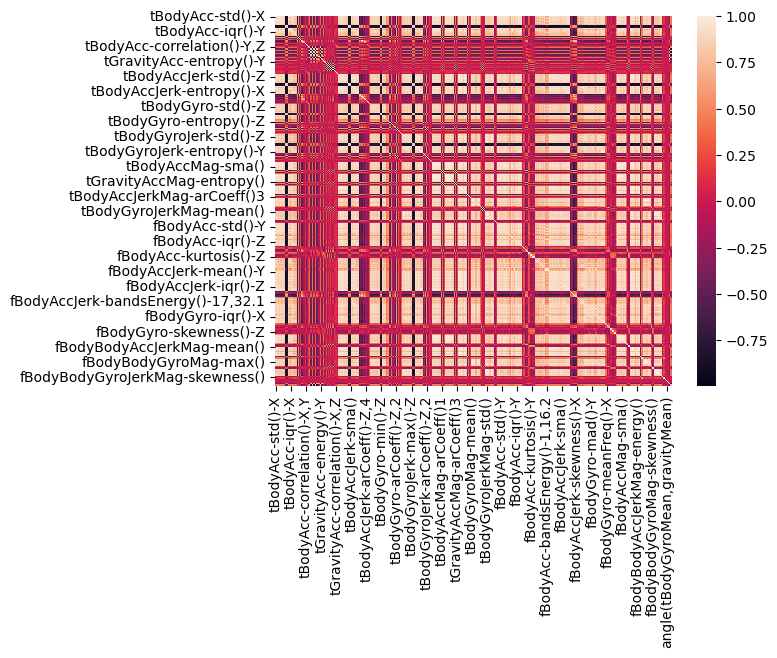

In [177]:
sns.heatmap(x_train.corr())

Seeing relation of 1 columns with every other columns

In [178]:
corr_matrix =x_train.corr()

In [179]:
# corr_matrix.columns

In [180]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        # Access the cell of the Data frame

        if corr_matrix.loc[columns[i],columns[j]]>0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))


2023


In [181]:
len(set(columns_to_drop ))

217

In [182]:
x_train.drop(columns=columns_to_drop,axis=1,inplace=True)
x_test.drop(columns=columns_to_drop,axis=1,inplace=True)

In [183]:
print(x_train.shape)
print(x_test.shape)

(5881, 152)
(1471, 152)


## 3.) Anova

In [184]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [185]:
sel = SelectKBest(f_classif,k=100).fit(x_train,y_train)  # andar hie andar batadiya ki anova perform karo & k=100 mtlb ki 100 best columns do 
x_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [186]:
columns =x_train.columns[sel.get_support()]

In [187]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

In [188]:
x_train
y_train

array([0, 5, 5, ..., 3, 2, 3])

In [189]:
x_train = pd.DataFrame(x_train,columns=columns)
x_test = pd.DataFrame(x_test,columns=columns)

In [190]:
# x_train

In [191]:
# x_test

#### Moment of Truth

In [192]:
log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(x_train,y_train)

y_pred2 = log_reg2.predict(x_test)

accuracy_score(y_pred2,y_test)

0.9700883752549286

563 Columns kesath 98 % 

100 Columns kesath 97 % 

In [193]:
df2 = pd.read_csv("Titanic-Dataset.csv")

In [194]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Isme yeah dekhenge ki kya Sex imp feature hai ki nahi with Survived    
sex -> survived 


In [195]:
ct=pd.crosstab(df2['Survived'],df2['Sex'],margins=True)

Observed & Expected ka scene 

Agar Difference bhaut hie alag hai  
then yeah bataraha hai ki 

1 mai Changes laanese Dusre mai farak padraha hai 

In [196]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [197]:
from scipy.stats import chi2_contingency

In [198]:
chi2_contingency(ct)

(263.05057407065567,
 1.0036732821369117e-55,
 4,
 array([[193.47474747, 355.52525253, 549.        ],
        [120.52525253, 221.47474747, 342.        ],
        [314.        , 577.        , 891.        ]]))

In [206]:
score = []

for feature in df2.columns[:-1]:

    ct = pd.crosstab(df2['Survived'],df2[feature])

    P_value = chi2_contingency(ct)[1]
    score.append(P_value)


In [207]:
score

[0.484248151973633,
 7.352052198553542e-195,
 4.549251711298793e-23,
 0.484248151973633,
 1.1973570627755645e-58,
 0.10141111018860959,
 1.5585810465902116e-06,
 9.703526421039997e-05,
 0.01152729601163775,
 1.1647635739939964e-11,
 0.18357354976388165]

<AxesSubplot:>

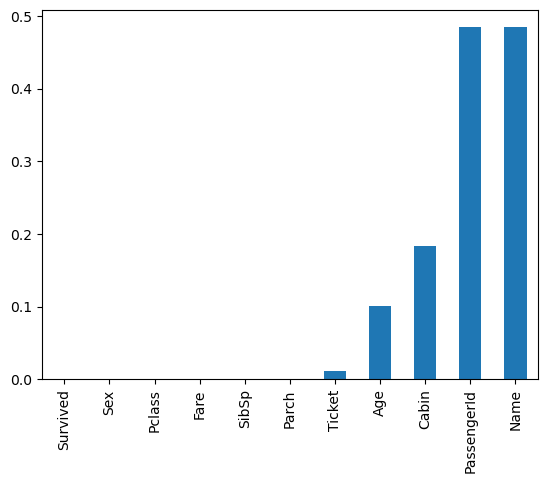

In [208]:
pd.Series(score, index=df2.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

in Chi-Square , jitna zyaada bada  P-value utna kamm importance feature, 

So Top 3 is 
Sex, Pclass Fare,SibSp